# WorldQuant University Capstone Project

## Topic 6: Value-at-Risk Methodologies under Commodities track

## Title: Estimating Portfolio Risk using Value-at-Risk and Expected Shortfall: A Comparative Study of Traditional and EVT Approaches

Composed By:
* Bryan Mutua Kibui
* Nicholas Johnson

Note: This is still a work in progress.

# Code Design Plan

* Downloading the price data for the assets we are going to analyse
* Run EDA on the data and do descriptive statistics on each asset property
* Using different methods to estimate VAR of each asset within the asset classes
* Discern and elaborate on the differences between the VAR estimated values
* Repeat similar methods to estimate the ES of each asset
* Explain the differences between the emphasis on VAR and ES
* From the analysis, we will try to build several portfolios which optimise for VAR and ES
* We will hopefully experiment with rolling VAR  across different market regimes

### Importing Required Libraries For Codes

In [1]:
# === Core Libraries ===
import numpy as np
import pandas as pd

# === Visualization ===
import matplotlib.pyplot as plt
import seaborn as sns

# === Statistical Functions ===
from scipy.stats import norm, gaussian_kde, genpareto

# === Data Acquisition ===
import yfinance as yf


### Retrieving Daily Price Data for the Different Asset Classes from Yahoo Finance Spanning From 2010 to 2024

In [2]:
# ========================
# Asset Lists
# ========================
assets = {
    'Equities': [
        'SPY', 'XLF', 'XLE', 'XLK', 'XLV', 'XLY', 'XLP', 'XLRE'
    ],
    'Commodities': [
        'GC=F', 'BZ=F', 'HG=F', 'ZC=F'
    ],
    'Bonds': [
        'TLT', 'SHY', 'BND', 'LQD', 'EMB'
    ],
    'Cryptos': [
        'BTC-USD', 'ETH-USD'
    ],
    'Forex': [
        'EURUSD=X', 'USDJPY=X', 'AUDUSD=X', 'USDCAD=X'
    ]
}

# Flatten ticker list
all_tickers = [ticker for group in assets.values() for ticker in group]

# ========================
# Download Config
# ========================
start_date = "2010-01-01"
end_date = "2024-12-31"

# ========================
# Download OHLCV Data
# ========================
asset_data = {}

for symbol in all_tickers:
    print(f"🔄 Fetching: {symbol}")
    try:
        df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]
        if not df.empty:
            asset_data[symbol] = df
            df.to_csv(f"{symbol.replace('=','').replace('-','_')}_ohlcv.csv")
        else:
            print(f"⚠️ No data for {symbol}.")
    except Exception as e:
        print(f"❌ Error fetching {symbol}: {e}")

print("✅ All downloads complete.")


🔄 Fetching: SPY


/tmp/ipython-input-2-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: XLF


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: XLE


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: XLK


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: XLV


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: XLY


[*********************100%***********************]  1 of 1 completed


🔄 Fetching: XLP


/tmp/ipython-input-2-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: XLRE


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: GC=F


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: BZ=F


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: HG=F


[*********************100%***********************]  1 of 1 completed


🔄 Fetching: ZC=F


/tmp/ipython-input-2-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: TLT


[*********************100%***********************]  1 of 1 completed


🔄 Fetching: SHY


/tmp/ipython-input-2-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: BND


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: LQD


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: EMB


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: BTC-USD


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: ETH-USD


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: EURUSD=X


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: USDJPY=X


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: AUDUSD=X


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-189326010.py:39: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]


🔄 Fetching: USDCAD=X


[*********************100%***********************]  1 of 1 completed

✅ All downloads complete.


### Generate Plots for the Original Price Data

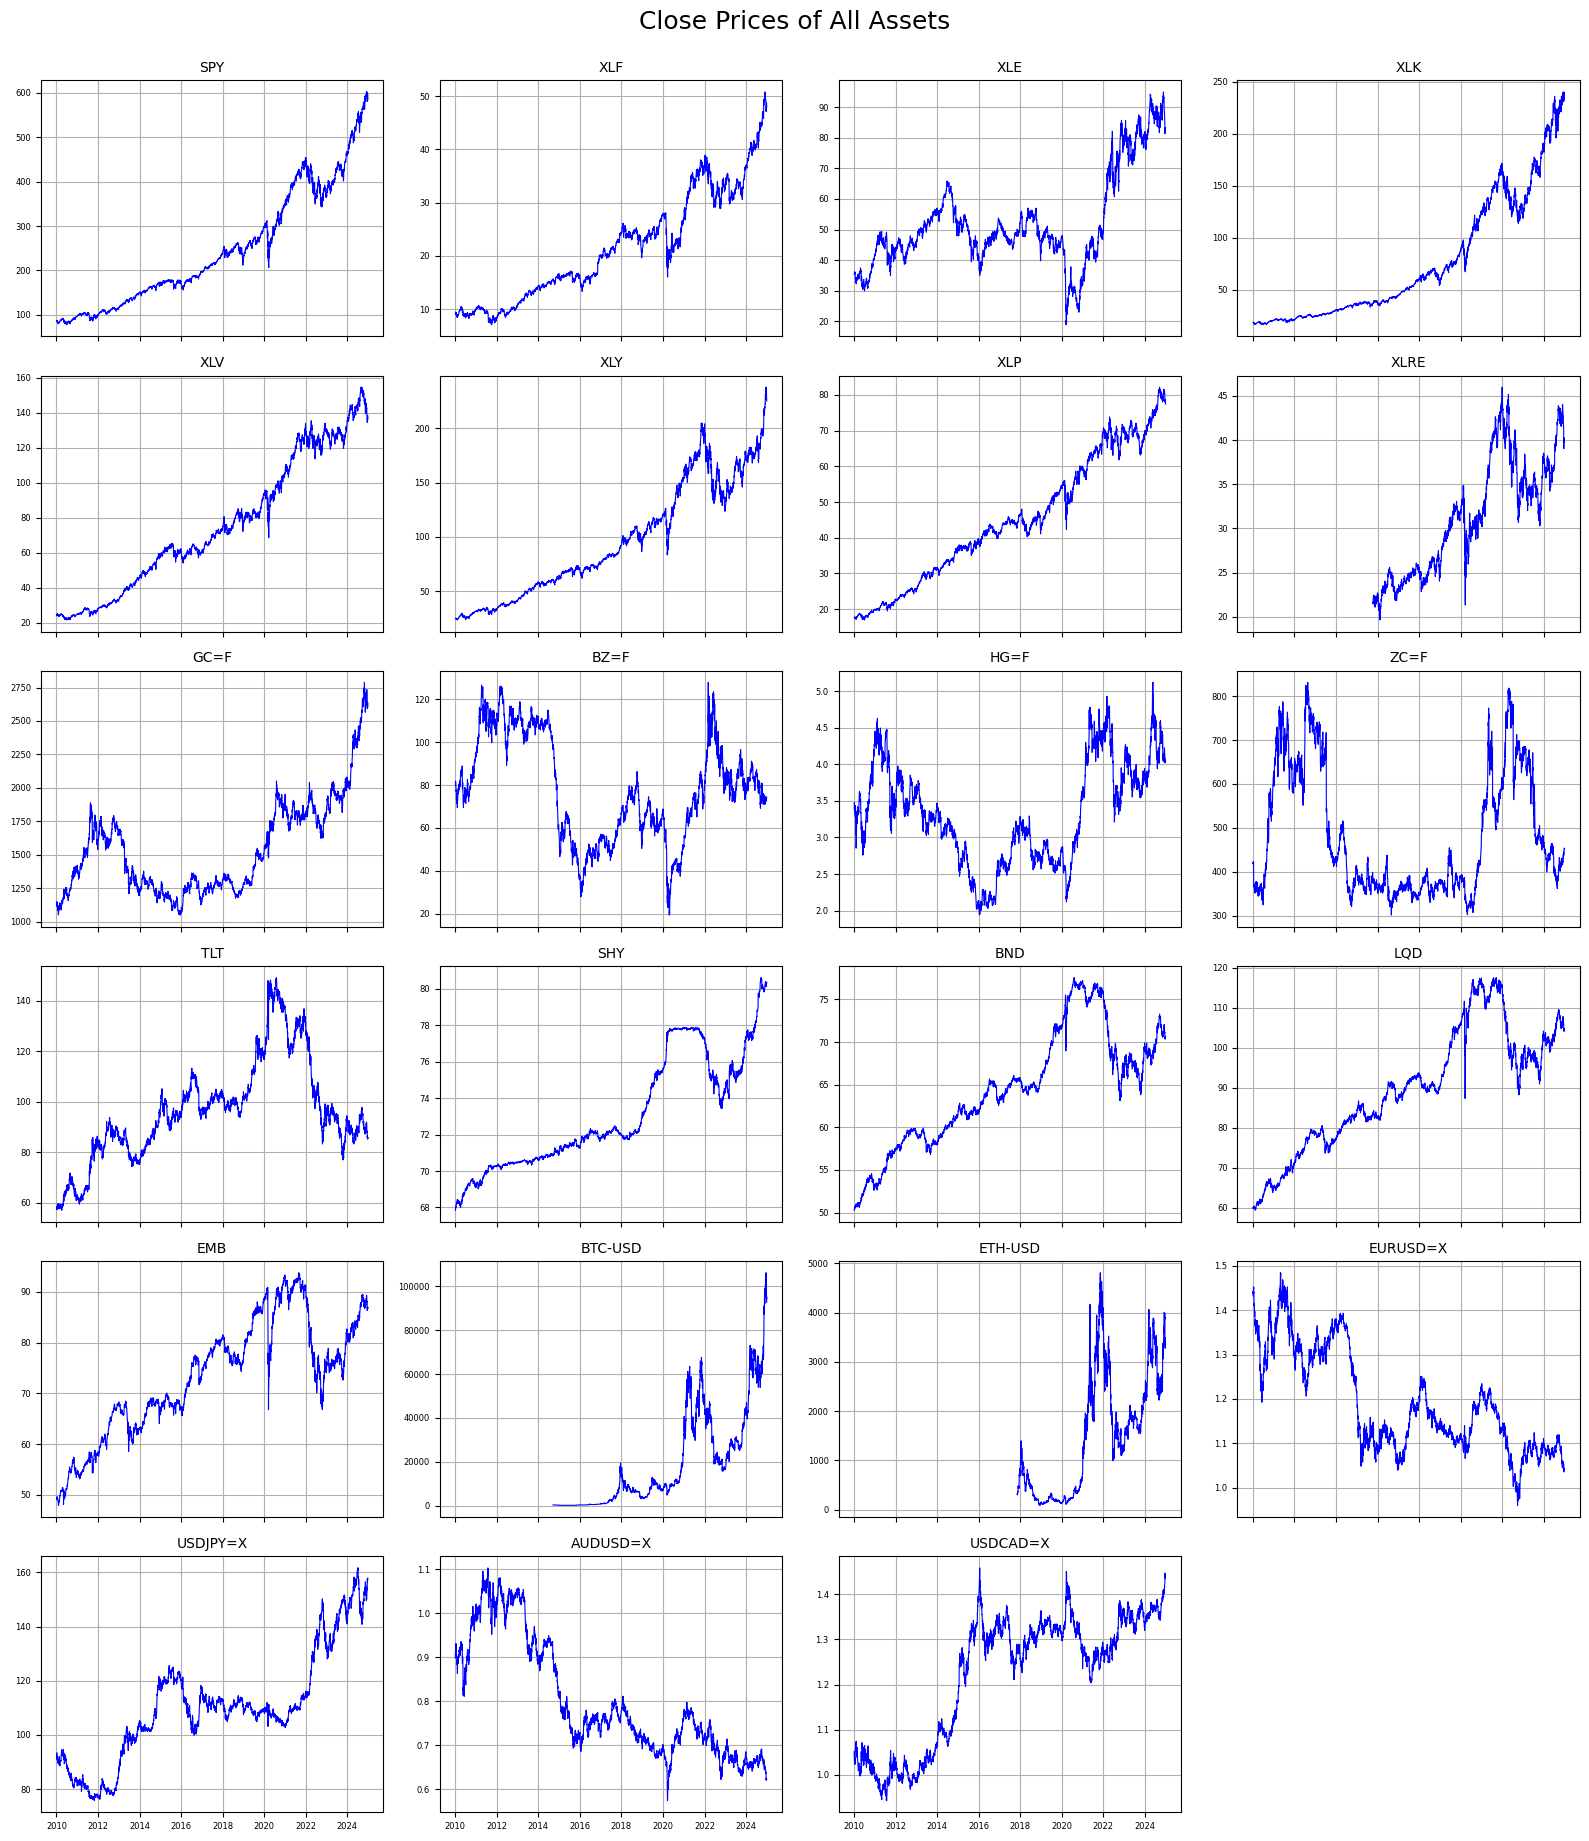

In [3]:
def plot_all_close_prices_grid(data_dict, rows=17, cols=4):
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3), sharex=True)
    axes = axes.flatten()  # Flatten for easy indexing

    for idx, (symbol, df) in enumerate(data_dict.items()):
        if idx >= rows * cols:
            print(f"Only plotting first {rows * cols} assets.")
            break
        if df.empty or 'Close' not in df:
            continue

        ax = axes[idx]
        ax.plot(df.index, df['Close'], color='blue', linewidth=0.8)
        ax.set_title(symbol, fontsize=10)
        ax.tick_params(axis='both', which='both', labelsize=6)
        ax.grid(True)

    # Hide any unused subplots
    for i in range(len(data_dict), rows * cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.suptitle("Close Prices of All Assets", fontsize=18, y=1.02)
    plt.show()

# Plot
plot_all_close_prices_grid(asset_data, rows=6, cols=4)


Total assets: 23
SPY: 2010-01-04 to 2024-12-30, 3773 rows
XLF: 2010-01-04 to 2024-12-30, 3773 rows
XLE: 2010-01-04 to 2024-12-30, 3773 rows
XLK: 2010-01-04 to 2024-12-30, 3773 rows
XLV: 2010-01-04 to 2024-12-30, 3773 rows
XLY: 2010-01-04 to 2024-12-30, 3773 rows
XLP: 2010-01-04 to 2024-12-30, 3773 rows
XLRE: 2015-10-08 to 2024-12-30, 2322 rows
GC=F: 2010-01-04 to 2024-12-30, 3770 rows
BZ=F: 2010-01-04 to 2024-12-30, 3740 rows
HG=F: 2010-01-04 to 2024-12-30, 3771 rows
ZC=F: 2010-01-04 to 2024-12-30, 3769 rows
TLT: 2010-01-04 to 2024-12-30, 3773 rows
SHY: 2010-01-04 to 2024-12-30, 3773 rows
BND: 2010-01-04 to 2024-12-30, 3773 rows
LQD: 2010-01-04 to 2024-12-30, 3773 rows
EMB: 2010-01-04 to 2024-12-30, 3773 rows
BTC-USD: 2014-09-17 to 2024-12-30, 3758 rows
ETH-USD: 2017-11-09 to 2024-12-30, 2609 rows
EURUSD=X: 2010-01-01 to 2024-12-30, 3907 rows
USDJPY=X: 2010-01-01 to 2024-12-30, 3907 rows
AUDUSD=X: 2010-01-01 to 2024-12-30, 3906 rows
USDCAD=X: 2010-01-01 to 2024-12-30, 3906 rows

Descri

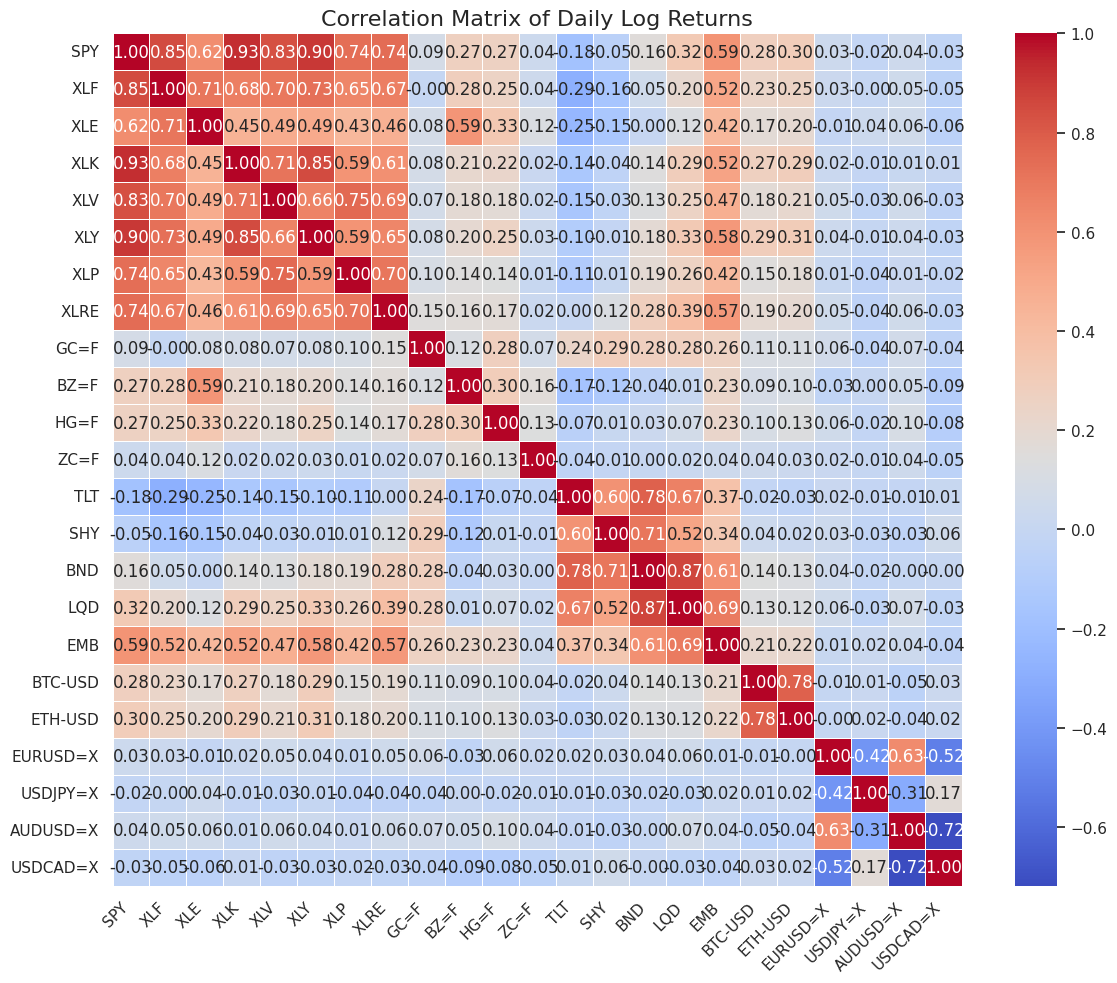

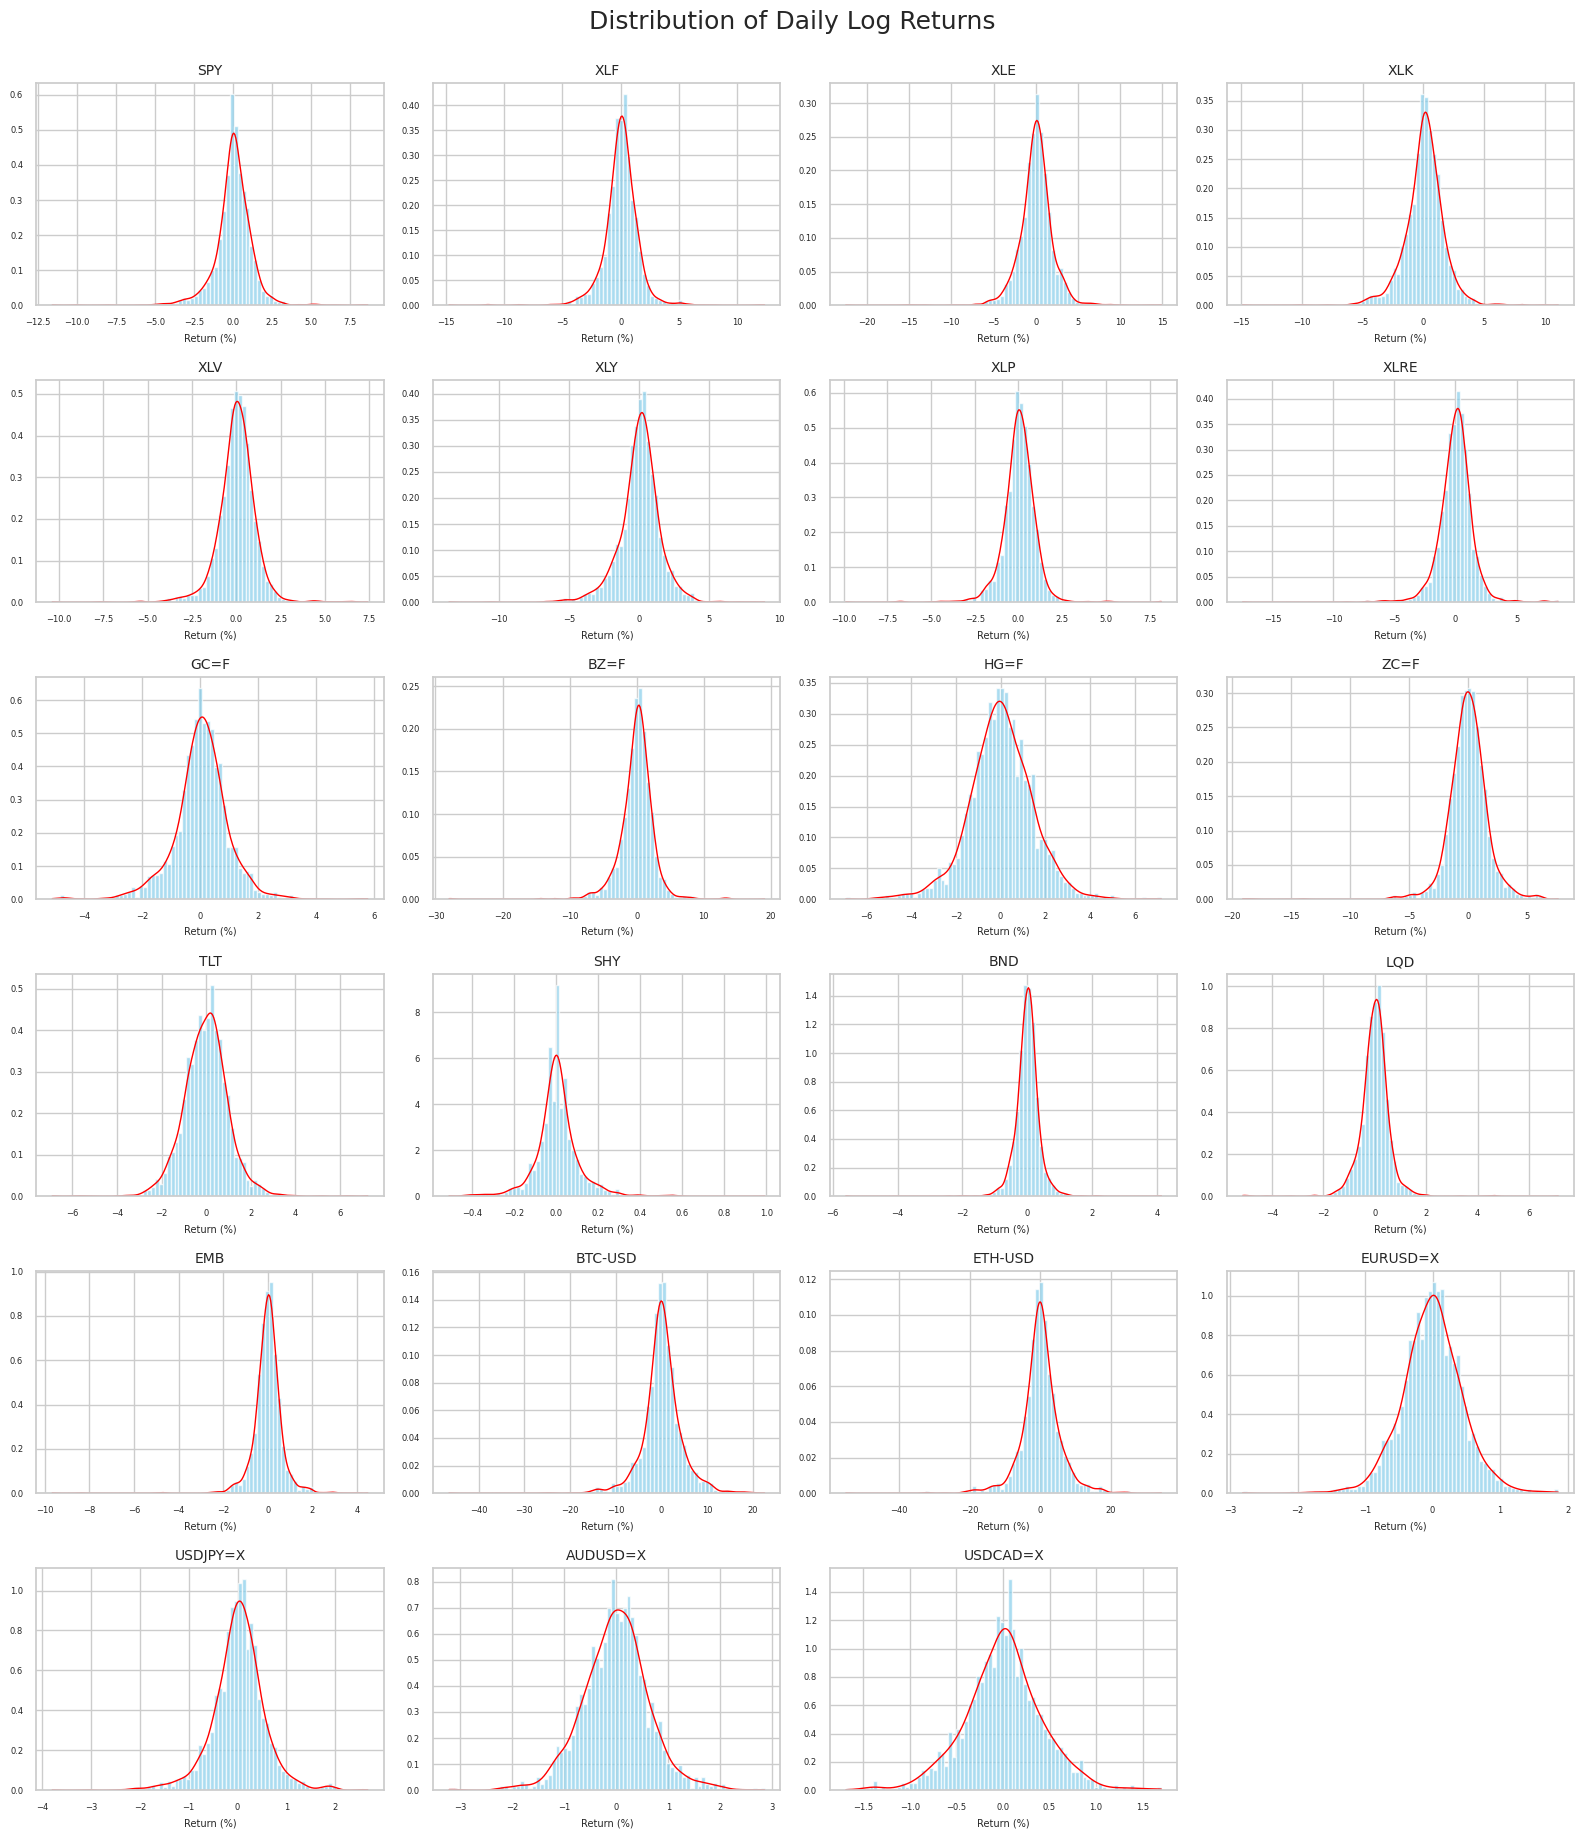

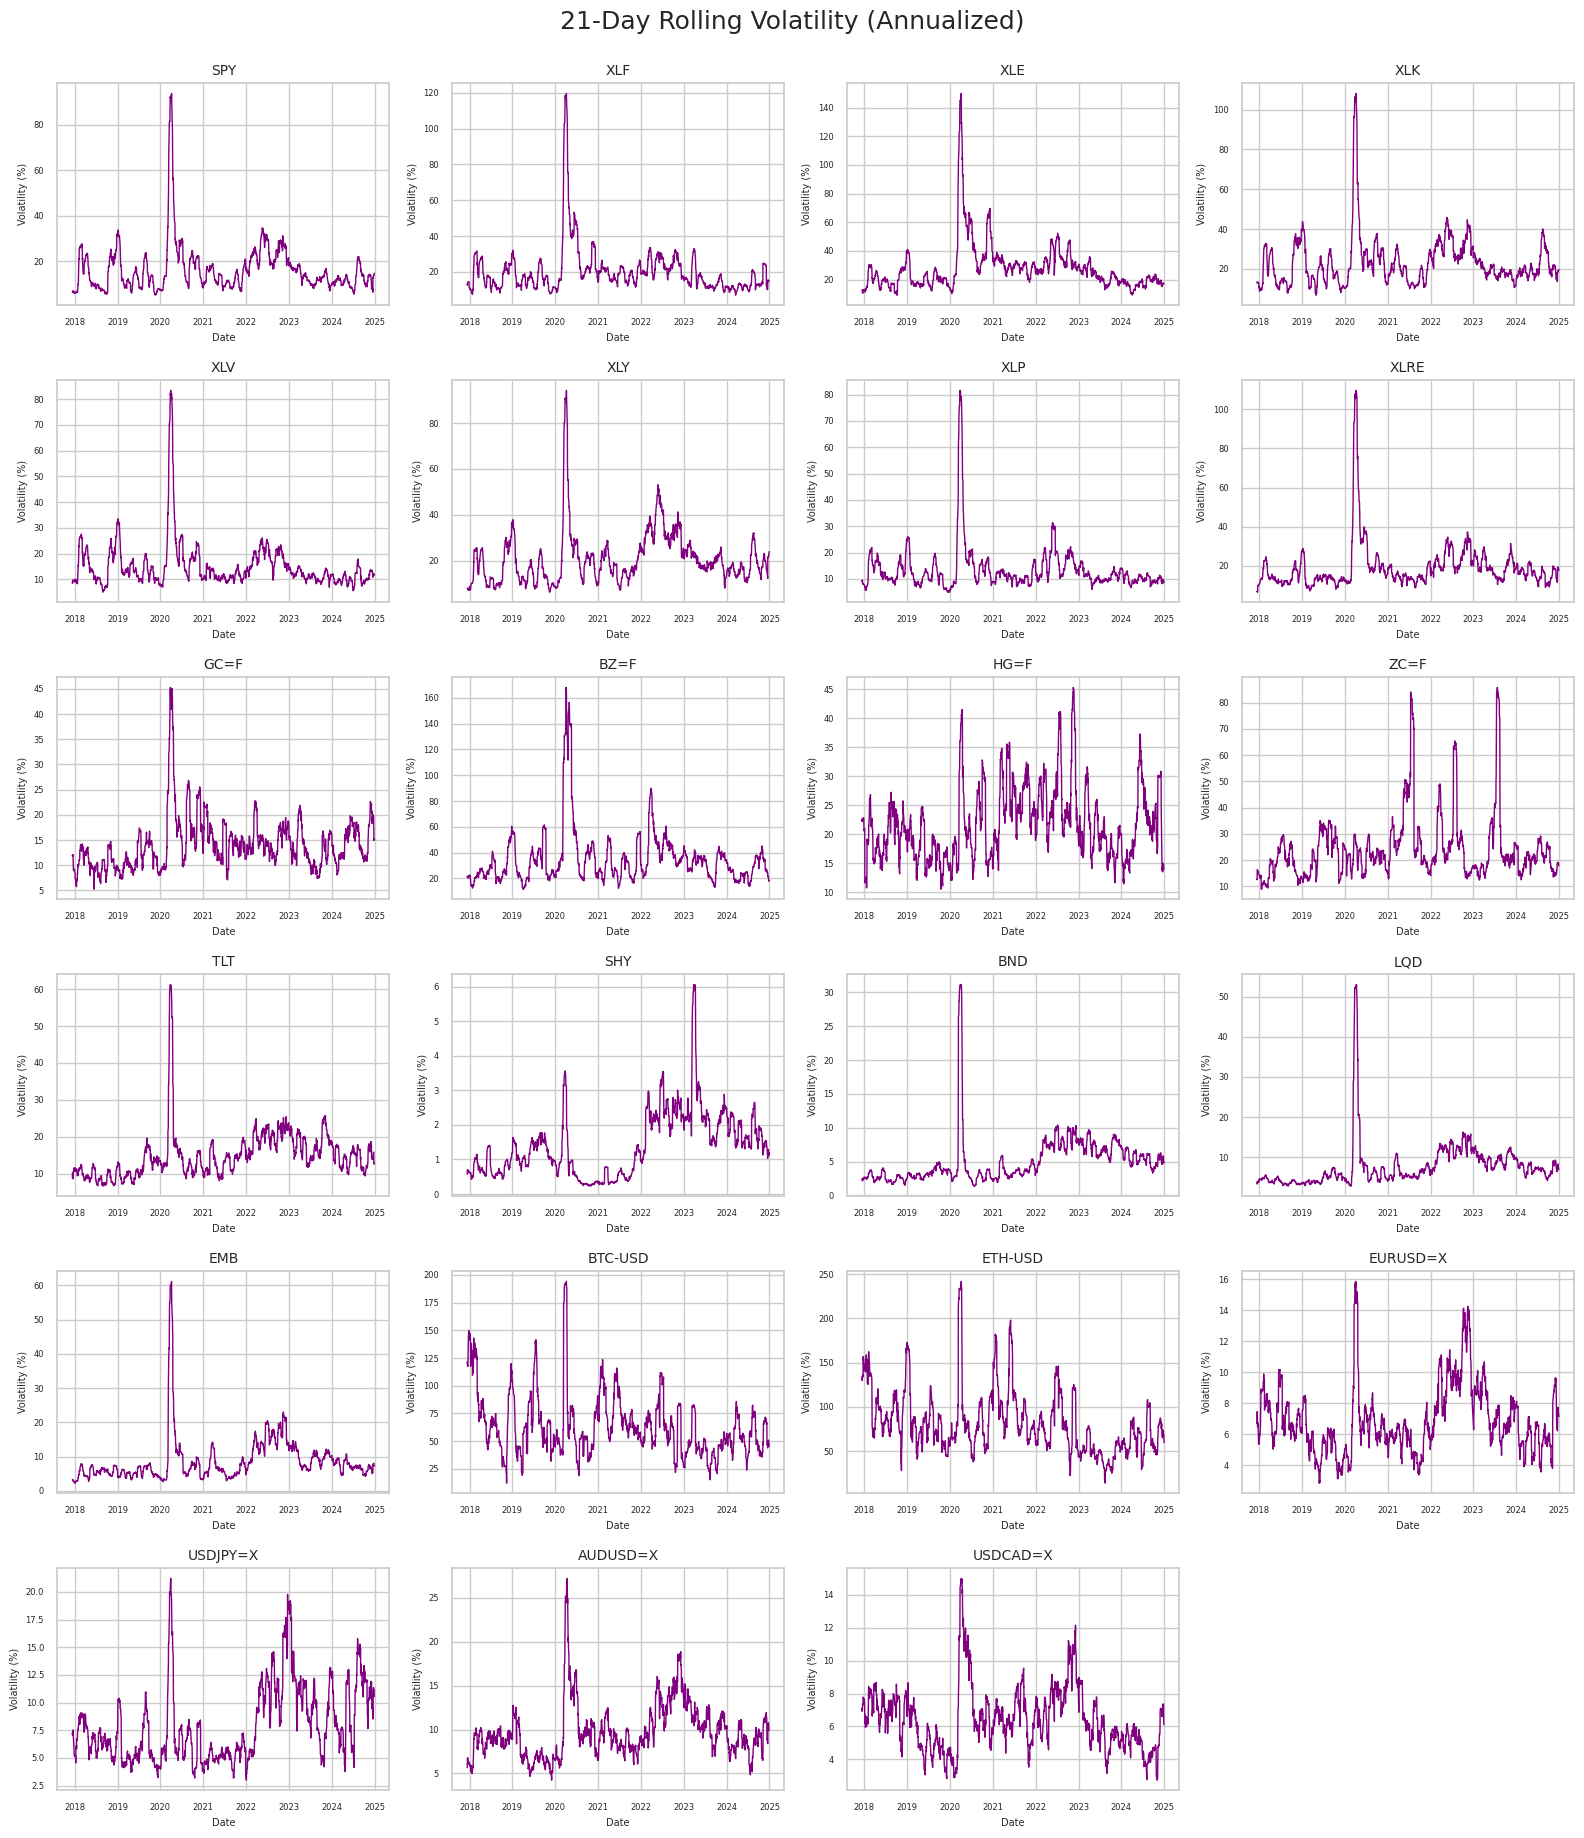


Descriptive Statistics (Daily Log Returns %):
           count  mean   std    min   25%   50%   75%    max  skew  kurtosis
SPY       1789.0  0.05  1.22 -11.59 -0.42  0.08  0.66   8.67 -0.82     12.68
XLF       1789.0  0.04  1.52 -14.74 -0.63  0.09  0.77  12.36 -0.59     15.02
XLE       1789.0  0.03  2.06 -22.49 -0.90  0.08  1.02  14.87 -0.93     15.34
XLK       1789.0  0.08  1.64 -14.87 -0.69  0.15  0.95  11.09 -0.44      7.89
XLV       1789.0  0.04  1.11 -10.38 -0.47  0.07  0.60   7.42 -0.47     10.79
XLY       1789.0  0.05  1.50 -13.55 -0.60  0.15  0.85   8.97 -0.77      7.76
XLP       1789.0  0.03  1.00  -9.87 -0.40  0.06  0.54   8.17 -0.56     15.93
XLRE      1789.0  0.02  1.42 -17.44 -0.63  0.09  0.73   8.42 -1.08     17.91
GC=F      1789.0  0.04  0.94  -5.11 -0.40  0.05  0.55   5.78 -0.27      4.05
BZ=F      1789.0  0.01  2.59 -27.98 -1.05  0.19  1.28  19.08 -1.37     19.63
HG=F      1789.0  0.02  1.42  -6.93 -0.82  0.01  0.91   7.20 -0.12      1.65
ZC=F      1789.0  0.02  1.71 

In [4]:
# Set default seaborn style
sns.set(style="whitegrid")

# =======================================
# Step 1: Basic Asset Information
# =======================================
print("Total assets:", len(asset_data))
for symbol, df in asset_data.items():
    start_date = df.index.min().date()
    end_date = df.index.max().date()
    print(f"{symbol}: {start_date} to {end_date}, {len(df)} rows")

# =======================================
# Step 2: Descriptive Statistics (Close)
# =======================================

def extract_close_prices(asset_data):
    """Extracts a DataFrame of close prices from a dictionary of asset DataFrames."""
    close_dict = {}
    for symbol, df in asset_data.items():
        if isinstance(df.columns, pd.MultiIndex):
            col = ('Close', symbol)
        else:
            col = 'Close'

        if col in df.columns and not df[col].isnull().all():
            close_dict[symbol] = df[col]

    return pd.DataFrame(close_dict).dropna(how='any')

# Extract valid close prices
close_prices = extract_close_prices(asset_data)

# Compute descriptive statistics
desc_df = close_prices.describe().T.round(2)

print("\nDescriptive Statistics (Close):")
print(desc_df)

# =======================================
# Step 3: Daily Log Returns & Correlation Matrix
# =======================================

# Compute daily log returns
log_returns = np.log(close_prices / close_prices.shift(1)).dropna()

# Plot correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    log_returns.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Matrix of Daily Log Returns", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# =======================================
# Step 4: Distribution & Rolling Volatility
# =======================================

def plot_return_distributions_grid(log_returns, rows=6, cols=4):
    """Plot histogram and KDE of daily returns for each asset in a grid layout."""
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
    axes = axes.flatten()

    for idx, symbol in enumerate(log_returns.columns):
        if idx >= rows * cols:
            print(f"Only plotting first {rows * cols} assets.")
            break

        data = log_returns[symbol].dropna() * 100  # Convert to percentage
        ax = axes[idx]

        # Histogram
        ax.hist(data, bins=80, color='skyblue', alpha=0.7, density=True)

        # KDE
        kde = gaussian_kde(data)
        x_vals = np.linspace(data.min(), data.max(), 300)
        ax.plot(x_vals, kde(x_vals), color='red', linewidth=1)

        ax.set_title(symbol, fontsize=10)
        ax.set_xlabel("Return (%)", fontsize=7)
        ax.tick_params(axis='both', which='both', labelsize=6)
        ax.grid(True)

    # Remove unused axes
    for i in range(len(log_returns.columns), rows * cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.suptitle("Distribution of Daily Log Returns", fontsize=18, y=1.02)
    plt.show()


def plot_rolling_volatility_grid(log_returns, rows=6, cols=4, window=21):
    """Plot 21-day rolling volatility of daily log returns."""
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
    axes = axes.flatten()

    for idx, symbol in enumerate(log_returns.columns):
        if idx >= rows * cols:
            print(f"Only plotting first {rows * cols} assets.")
            break

        vol = log_returns[symbol].rolling(window=window).std() * np.sqrt(252) * 100  # annualized volatility %
        ax = axes[idx]

        ax.plot(vol.index, vol, color='purple', linewidth=1)
        ax.set_title(f"{symbol}", fontsize=10)
        ax.set_xlabel("Date", fontsize=7)
        ax.set_ylabel("Volatility (%)", fontsize=7)
        ax.tick_params(axis='both', which='both', labelsize=6)
        ax.grid(True)

    for i in range(len(log_returns.columns), rows * cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.suptitle("21-Day Rolling Volatility (Annualized)", fontsize=18, y=1.02)
    plt.show()

# ==== Call Plotting Functions ====
plot_return_distributions_grid(log_returns, rows=6, cols=4)
plot_rolling_volatility_grid(log_returns, rows=6, cols=4)

# =======================================
# Step 5: Descriptive Statistics of Daily Log Returns
# =======================================

# Convert log returns to percentage scale
log_returns_pct = log_returns * 100

# Base descriptive statistics
return_stats_df = log_returns_pct.describe().T

# Add skewness and kurtosis
return_stats_df["skew"] = log_returns_pct.skew()
return_stats_df["kurtosis"] = log_returns_pct.kurtosis()

# Round and display
return_stats_df = return_stats_df.round(2)

print("\nDescriptive Statistics (Daily Log Returns %):")
print(return_stats_df)



## VAR

### Parametric VAR

In [5]:
# =======================================
# Type 1: Parametric VaR (1-Day, 99% Confidence Level)
# =======================================

# Define confidence level and Z-score
confidence_level = 0.99
z_score = norm.ppf(1 - confidence_level)  # left tail (negative side)

# Extract valid close prices
def extract_close_prices(asset_data):
    close_dict = {}
    for symbol, df in asset_data.items():
        col = ('Close', symbol) if isinstance(df.columns, pd.MultiIndex) else 'Close'
        if col in df.columns and not df[col].isnull().all():
            close_dict[symbol] = df[col]
    return pd.DataFrame(close_dict).dropna(how='any')

close_prices = extract_close_prices(asset_data)

# Compute daily log returns
log_returns = np.log(close_prices / close_prices.shift(1)).dropna()

# Calculate parametric VaR (%)
var_percent = -z_score * log_returns.std() * 100

# Convert to DataFrame and sort
var_df = var_percent.to_frame(name='1-Day Parametric VaR (%)')
var_df = var_df.sort_values(by='1-Day Parametric VaR (%)', ascending=False)

# Display result
print("\n1-Day Parametric VaR at 99% Confidence Level (in %):")
print(var_df)



1-Day Parametric VaR at 99% Confidence Level (in %):
          1-Day Parametric VaR (%)
ETH-USD                  13.113960
BTC-USD                  10.278800
BZ=F                      6.018117
XLE                       4.803281
ZC=F                      3.969545
XLK                       3.814017
XLF                       3.538090
XLY                       3.480795
HG=F                      3.311390
XLRE                      3.305730
SPY                       2.846971
XLV                       2.572696
TLT                       2.370470
XLP                       2.322044
GC=F                      2.186715
EMB                       1.634343
AUDUSD=X                  1.498583
LQD                       1.415771
USDJPY=X                  1.272275
EURUSD=X                  1.052098
USDCAD=X                  0.983312
BND                       0.897065
SHY                       0.249153


### Historical VAR

In [6]:
# =======================================
# Type 2: Historical Simulation VaR (1-Day, 99% Confidence Level)
# =======================================

# Set confidence level and quantile
confidence_level = 0.99
quantile_level = 1 - confidence_level  # e.g., 0.01 for 99% confidence

# Compute historical VaR (in %)
hist_var = -log_returns.quantile(quantile_level, axis=0) * 100  # Flip sign to represent loss

# Convert to DataFrame and sort
hist_var_df = hist_var.to_frame(name='1-Day Historical VaR (%)')
hist_var_df = hist_var_df.sort_values(by='1-Day Historical VaR (%)', ascending=False)

# Display result
print("\n1-Day Historical VaR at 99% Confidence Level (in %):")
print(hist_var_df)



1-Day Historical VaR at 99% Confidence Level (in %):
          1-Day Historical VaR (%)
ETH-USD                  16.799604
BTC-USD                  13.478386
BZ=F                      7.031417
XLE                       5.413065
ZC=F                      4.683246
XLK                       4.539248
XLY                       4.131385
HG=F                      3.986059
XLRE                      3.882496
XLF                       3.818156
SPY                       3.480578
XLV                       3.205271
XLP                       2.737942
GC=F                      2.535851
TLT                       2.380966
AUDUSD=X                  1.706097
EMB                       1.697748
USDJPY=X                  1.594774
LQD                       1.432406
EURUSD=X                  1.179485
USDCAD=X                  1.064533
BND                       0.925994
SHY                       0.317052


### Monte Carlo Simulated VAR


1-Day Monte Carlo VaR at 99% Confidence Level (in %):
          1-Day Monte Carlo VaR (%)
ETH-USD                   13.083825
BTC-USD                   10.168154
BZ=F                       6.087702
XLE                        4.791193
ZC=F                       3.960251
XLK                        3.771813
XLF                        3.510235
XLY                        3.423642
HG=F                       3.318785
XLRE                       3.303925
SPY                        2.776549
XLV                        2.534419
TLT                        2.378631
XLP                        2.277891
GC=F                       2.147350
EMB                        1.643196
AUDUSD=X                   1.499986
LQD                        1.405622
USDJPY=X                   1.255559
EURUSD=X                   1.053681
USDCAD=X                   0.972174
BND                        0.884803
SHY                        0.244182


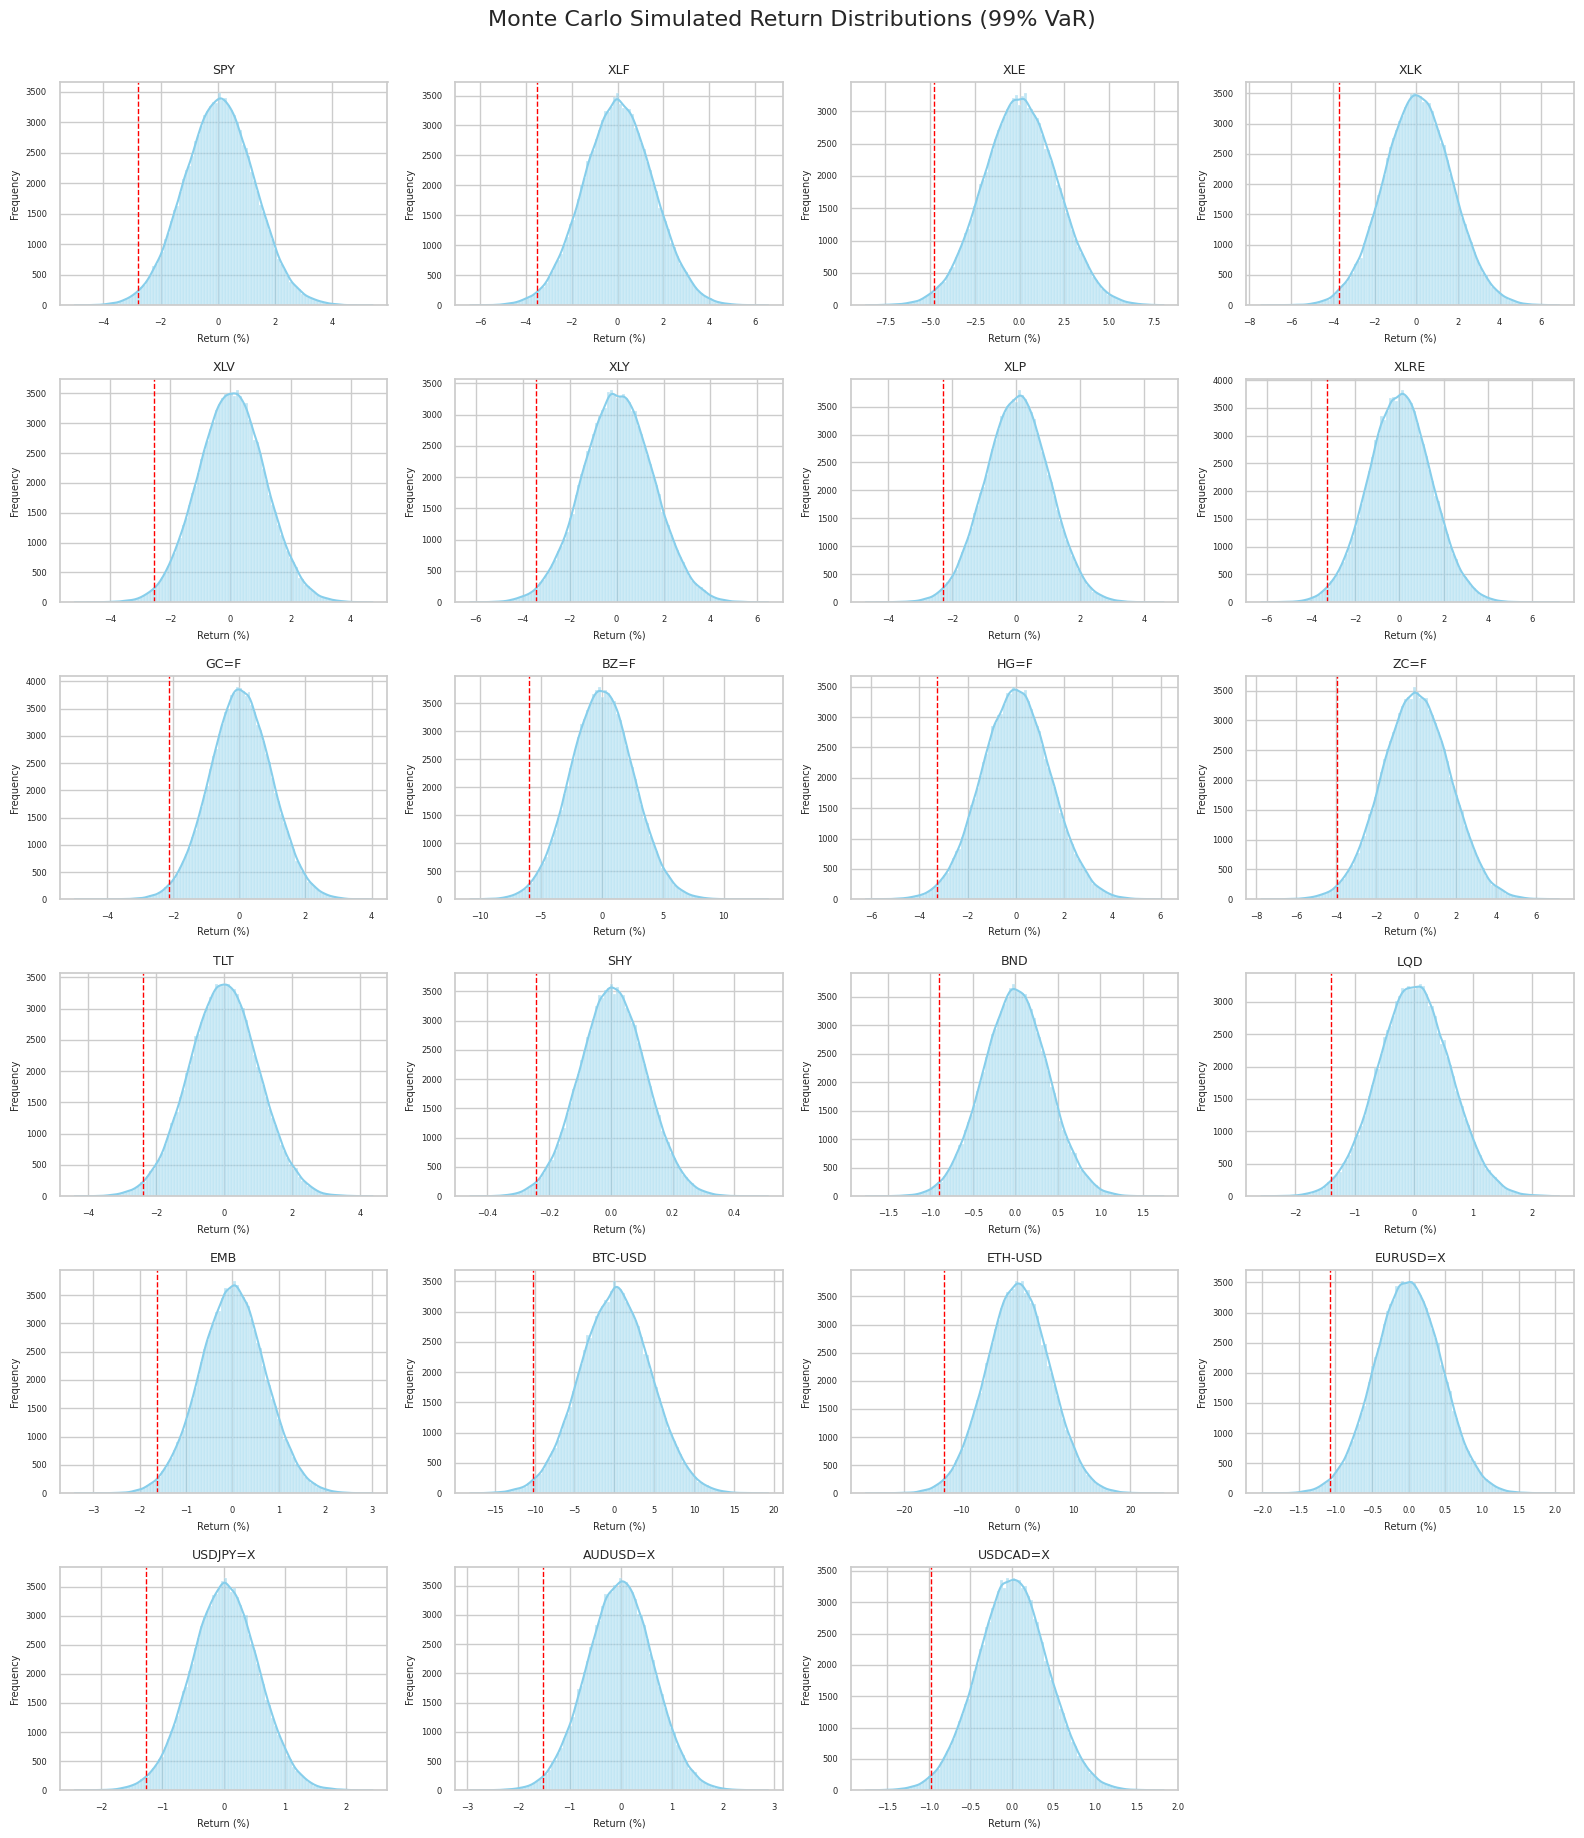

In [7]:
# =======================================
# Type 3: Monte Carlo Simulation VaR (1-Day, 99% Confidence Level)
# =======================================

# Parameters
confidence_level = 0.99
quantile_level = 1 - confidence_level
n_simulations = 100_000

# Compute Monte Carlo VaR
monte_carlo_var = {}

for symbol in log_returns.columns:
    mu = log_returns[symbol].mean()
    sigma = log_returns[symbol].std()

    # Simulate returns
    simulated_returns = np.random.normal(loc=mu, scale=sigma, size=n_simulations)

    # Calculate 1% quantile and convert to positive loss %
    var = -np.percentile(simulated_returns, 100 * quantile_level) * 100
    monte_carlo_var[symbol] = var

# Format and sort result
monte_var_df = pd.DataFrame.from_dict(monte_carlo_var, orient='index', columns=['1-Day Monte Carlo VaR (%)'])
monte_var_df = monte_var_df.sort_values(by='1-Day Monte Carlo VaR (%)', ascending=False)

print("\n1-Day Monte Carlo VaR at 99% Confidence Level (in %):")
print(monte_var_df)

# =======================================
# Visualization: Monte Carlo Return Distributions
# =======================================

def plot_monte_carlo_var_grid(log_returns, confidence_level=0.99, n_simulations=100_000, rows=6, cols=4):
    """Plots Monte Carlo simulated return histograms with VaR threshold per asset."""
    quantile_level = 1 - confidence_level
    symbols = list(log_returns.columns)
    total_assets = len(symbols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
    axes = axes.flatten()

    for idx, symbol in enumerate(symbols):
        if idx >= rows * cols:
            print(f"Only plotting first {rows * cols} assets.")
            break

        mu = log_returns[symbol].mean()
        sigma = log_returns[symbol].std()

        simulated_returns = np.random.normal(loc=mu, scale=sigma, size=n_simulations)
        var_threshold = np.percentile(simulated_returns, 100 * quantile_level)

        ax = axes[idx]
        sns.histplot(simulated_returns * 100, bins=100, kde=True, color='skyblue', ax=ax)

        # Add VaR threshold line
        ax.axvline(var_threshold * 100, color='red', linestyle='--', linewidth=1)
        ax.set_title(symbol, fontsize=9)
        ax.set_xlabel("Return (%)", fontsize=7)
        ax.set_ylabel("Frequency", fontsize=7)
        ax.tick_params(axis='both', which='both', labelsize=6)
        ax.grid(True)

    # Remove unused subplots
    for i in range(total_assets, rows * cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.suptitle("Monte Carlo Simulated Return Distributions (99% VaR)", fontsize=16, y=1.02)
    plt.show()

# ✅ Plot Monte Carlo VaR histograms
plot_monte_carlo_var_grid(log_returns, rows=6, cols=4)


### EVT based VAR

In [11]:
# =======================================
# Type 4: Extreme Value Theory VaR (1-Day, 99% Confidence Level)
# =======================================

from scipy.stats import genpareto

# Parameters
confidence_level = 0.99
threshold_quantile = 0.95  # threshold for POT
evt_var_results = {}

for symbol in log_returns.columns:
    returns = log_returns[symbol].dropna()

    # Extract threshold for POT (e.g., 95th percentile of losses)
    threshold = returns.quantile(1 - threshold_quantile)

    # Get exceedances (losses beyond the threshold)
    exceedances = -(returns[returns < threshold] - threshold)

    # Fit GPD to the exceedances
    if len(exceedances) < 30:
        print(f"⚠️ Not enough exceedances to fit GPD for {symbol}")
        continue

    c, loc, scale = genpareto.fit(exceedances)

    # Calculate VaR at 99% confidence level using GPD
    n = len(returns)
    nu = len(exceedances)
    p = 1 - confidence_level

    var_evt = threshold + (scale / c) * ((p * n / nu) ** (-c) - 1)
    var_evt = -var_evt * 100  # Convert to positive loss percentage
    evt_var_results[symbol] = var_evt

# Format and sort result
evt_var_df = pd.DataFrame.from_dict(evt_var_results, orient='index', columns=['1-Day EVT VaR (%)'])
evt_var_df = evt_var_df.sort_values(by='1-Day EVT VaR (%)', ascending=False)

print("\n1-Day EVT VaR at 99% Confidence Level (in %):")
print(evt_var_df)



1-Day EVT VaR at 99% Confidence Level (in %):
          1-Day EVT VaR (%)
TLT                0.726620
HG=F               0.677770
GC=F               0.508109
AUDUSD=X           0.468061
XLE                0.386669
XLK                0.344648
EURUSD=X           0.316122
USDCAD=X           0.299492
LQD                0.284378
XLF                0.240076
XLY                0.234393
BTC-USD            0.201691
BZ=F               0.115009
BND                0.113344
ZC=F               0.043779
USDJPY=X           0.041531
XLP                0.028303
EMB                0.017360
SHY               -0.021426
XLRE              -0.090627
SPY               -0.097445
XLV               -0.451797
ETH-USD           -0.642809


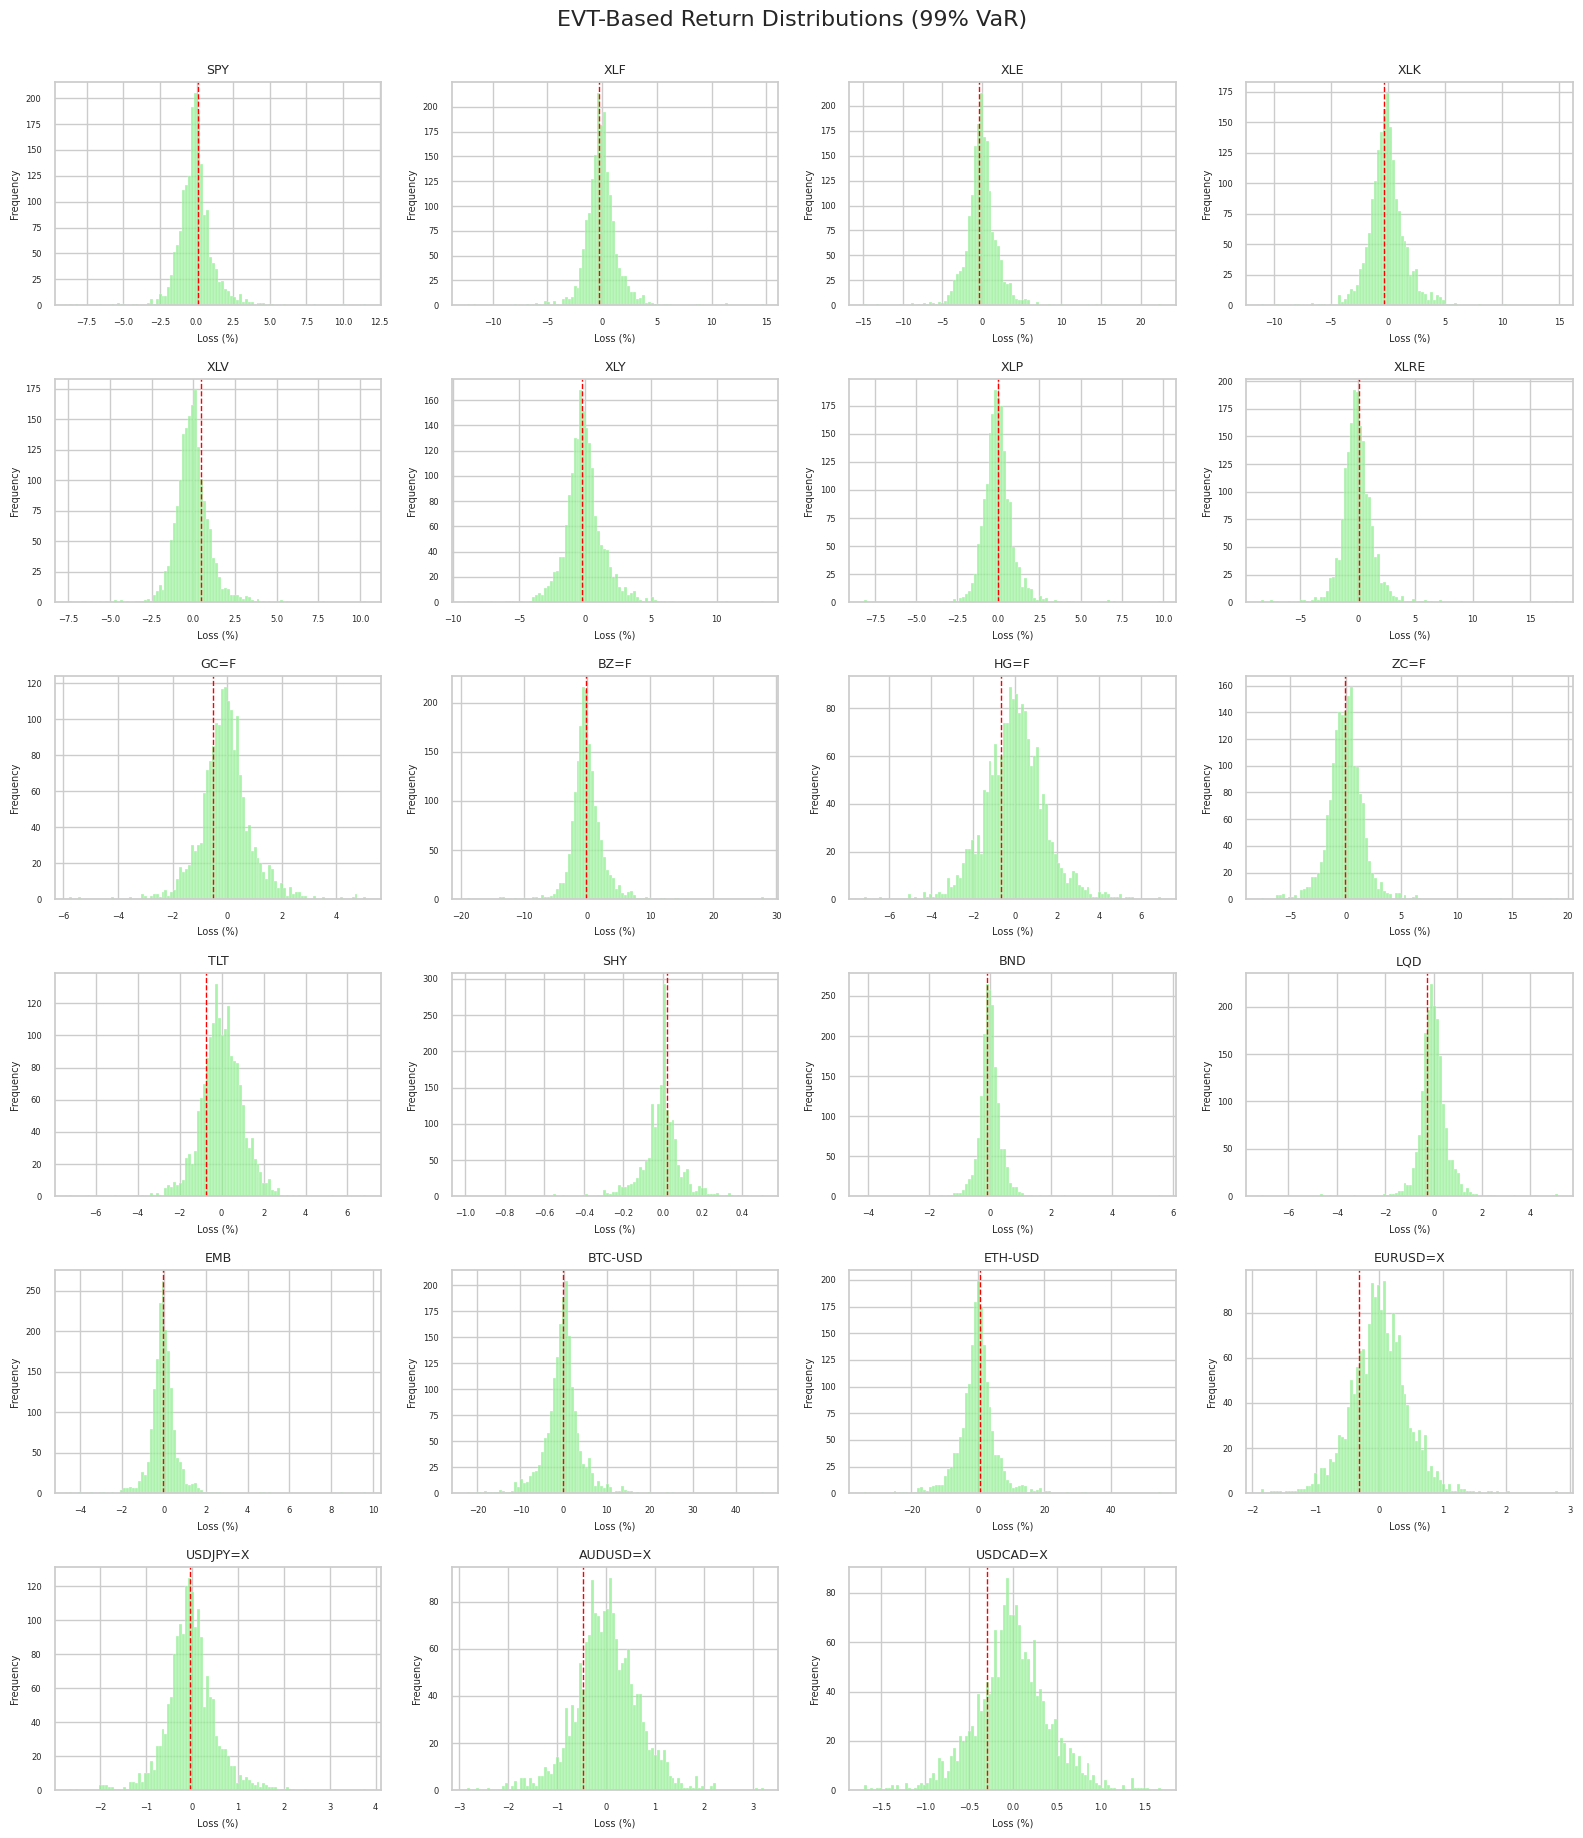

In [12]:
# =======================================
# Visualization: EVT Return Distributions with Fitted GPD
# =======================================

def plot_evt_var_grid(log_returns, confidence_level=0.99, threshold_quantile=0.95, rows=6, cols=4):
    symbols = list(log_returns.columns)
    total_assets = len(symbols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
    axes = axes.flatten()

    for idx, symbol in enumerate(symbols):
        if idx >= rows * cols:
            print(f"Only plotting first {rows * cols} assets.")
            break

        returns = log_returns[symbol].dropna()
        threshold = returns.quantile(1 - threshold_quantile)
        exceedances = -(returns[returns < threshold] - threshold)

        if len(exceedances) < 30:
            print(f"⚠️ Not enough exceedances to fit GPD for {symbol}")
            continue

        c, loc, scale = genpareto.fit(exceedances)
        n = len(returns)
        nu = len(exceedances)
        p = 1 - confidence_level

        var_evt = threshold + (scale / c) * ((p * n / nu) ** (-c) - 1)
        var_evt_plot = var_evt * 100  # for plotting
        simulated_loss = -returns * 100  # flip to positive loss for histogram

        ax = axes[idx]
        sns.histplot(simulated_loss, bins=100, kde=False, color='lightgreen', ax=ax)

        # Add EVT VaR line
        ax.axvline(var_evt_plot, color='red', linestyle='--', linewidth=1)
        ax.set_title(symbol, fontsize=9)
        ax.set_xlabel("Loss (%)", fontsize=7)
        ax.set_ylabel("Frequency", fontsize=7)
        ax.tick_params(axis='both', which='both', labelsize=6)
        ax.grid(True)

    # Remove unused subplots
    for i in range(total_assets, rows * cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.suptitle("EVT-Based Return Distributions (99% VaR)", fontsize=16, y=1.02)
    plt.show()

# ✅ Plot EVT VaR histograms
plot_evt_var_grid(log_returns, rows=6, cols=4)


## Expected Shortfall

### Parametric Expected Shortfall

In [8]:
# =======================================
# Type 1: Parametric Expected Shortfall (1-Day, 99% Confidence Level)
# =======================================

# Define confidence level and Z-score
confidence_level = 0.99
z_score = norm.ppf(1 - confidence_level)  # left tail (negative side)

# Extract valid close prices
def extract_close_prices(asset_data):
    close_dict = {}
    for symbol, df in asset_data.items():
        col = ('Close', symbol) if isinstance(df.columns, pd.MultiIndex) else 'Close'
        if col in df.columns and not df[col].isnull().all():
            close_dict[symbol] = df[col]
    return pd.DataFrame(close_dict).dropna(how='any')

close_prices = extract_close_prices(asset_data)

# Compute daily log returns
log_returns = np.log(close_prices / close_prices.shift(1)).dropna()

# Calculate parametric Expected Shortfall (%)
# Formula: ES = (σ * φ(z)) / (1 - α)
phi_z = norm.pdf(z_score)
es_percent = -(log_returns.std() * phi_z / (1 - confidence_level)) * 100

# Convert to DataFrame and sort
es_df = es_percent.to_frame(name='1-Day Parametric Expected Shortfall (%)')
es_df = es_df.sort_values(by='1-Day Parametric Expected Shortfall (%)', ascending=False)

# Display result
print("\n1-Day Parametric Expected Shortfall at 99% Confidence Level (in %):")
print(es_df)



1-Day Parametric Expected Shortfall at 99% Confidence Level (in %):
          1-Day Parametric Expected Shortfall (%)
SHY                                     -0.285446
BND                                     -1.027735
USDCAD=X                                -1.126546
EURUSD=X                                -1.205352
USDJPY=X                                -1.457600
LQD                                     -1.621998
AUDUSD=X                                -1.716874
EMB                                     -1.872409
GC=F                                    -2.505241
XLP                                     -2.660284
TLT                                     -2.715764
XLV                                     -2.947446
SPY                                     -3.261673
XLRE                                    -3.787257
HG=F                                    -3.793742
XLY                                     -3.987824
XLF                                     -4.053465
XLK                            

### Historical Expected Shortfall

In [9]:
# =======================================
# Type 2: Historical Simulation Expected Shortfall (1-Day, 99% Confidence Level)
# =======================================

# Set confidence level and quantile
confidence_level = 0.99
quantile_level = 1 - confidence_level  # e.g., 0.01 for 99% confidence

# Compute historical Expected Shortfall (in %)
def compute_historical_es(returns, quantile_level):
    es_dict = {}
    for col in returns.columns:
        sorted_returns = returns[col].sort_values()
        threshold = sorted_returns.quantile(quantile_level)
        tail_losses = sorted_returns[sorted_returns <= threshold]
        es = -tail_losses.mean() * 100  # Flip sign to represent loss
        es_dict[col] = es
    return pd.Series(es_dict)

hist_es = compute_historical_es(log_returns, quantile_level)

# Convert to DataFrame and sort
hist_es_df = hist_es.to_frame(name='1-Day Historical Expected Shortfall (%)')
hist_es_df = hist_es_df.sort_values(by='1-Day Historical Expected Shortfall (%)', ascending=False)

# Display result
print("\n1-Day Historical Expected Shortfall at 99% Confidence Level (in %):")
print(hist_es_df)



1-Day Historical Expected Shortfall at 99% Confidence Level (in %):
          1-Day Historical Expected Shortfall (%)
ETH-USD                                 23.147324
BTC-USD                                 17.761868
BZ=F                                    11.480512
XLE                                      8.697816
ZC=F                                     7.525386
XLF                                      6.501888
XLRE                                     6.240711
XLK                                      6.028447
XLY                                      6.018685
SPY                                      5.251458
HG=F                                     4.760980
XLV                                      4.577921
XLP                                      4.449365
GC=F                                     3.474955
TLT                                      3.343238
EMB                                      3.319912
LQD                                      2.520884
AUDUSD=X                       

### Monte Carlo Simulated Expected Shortfall

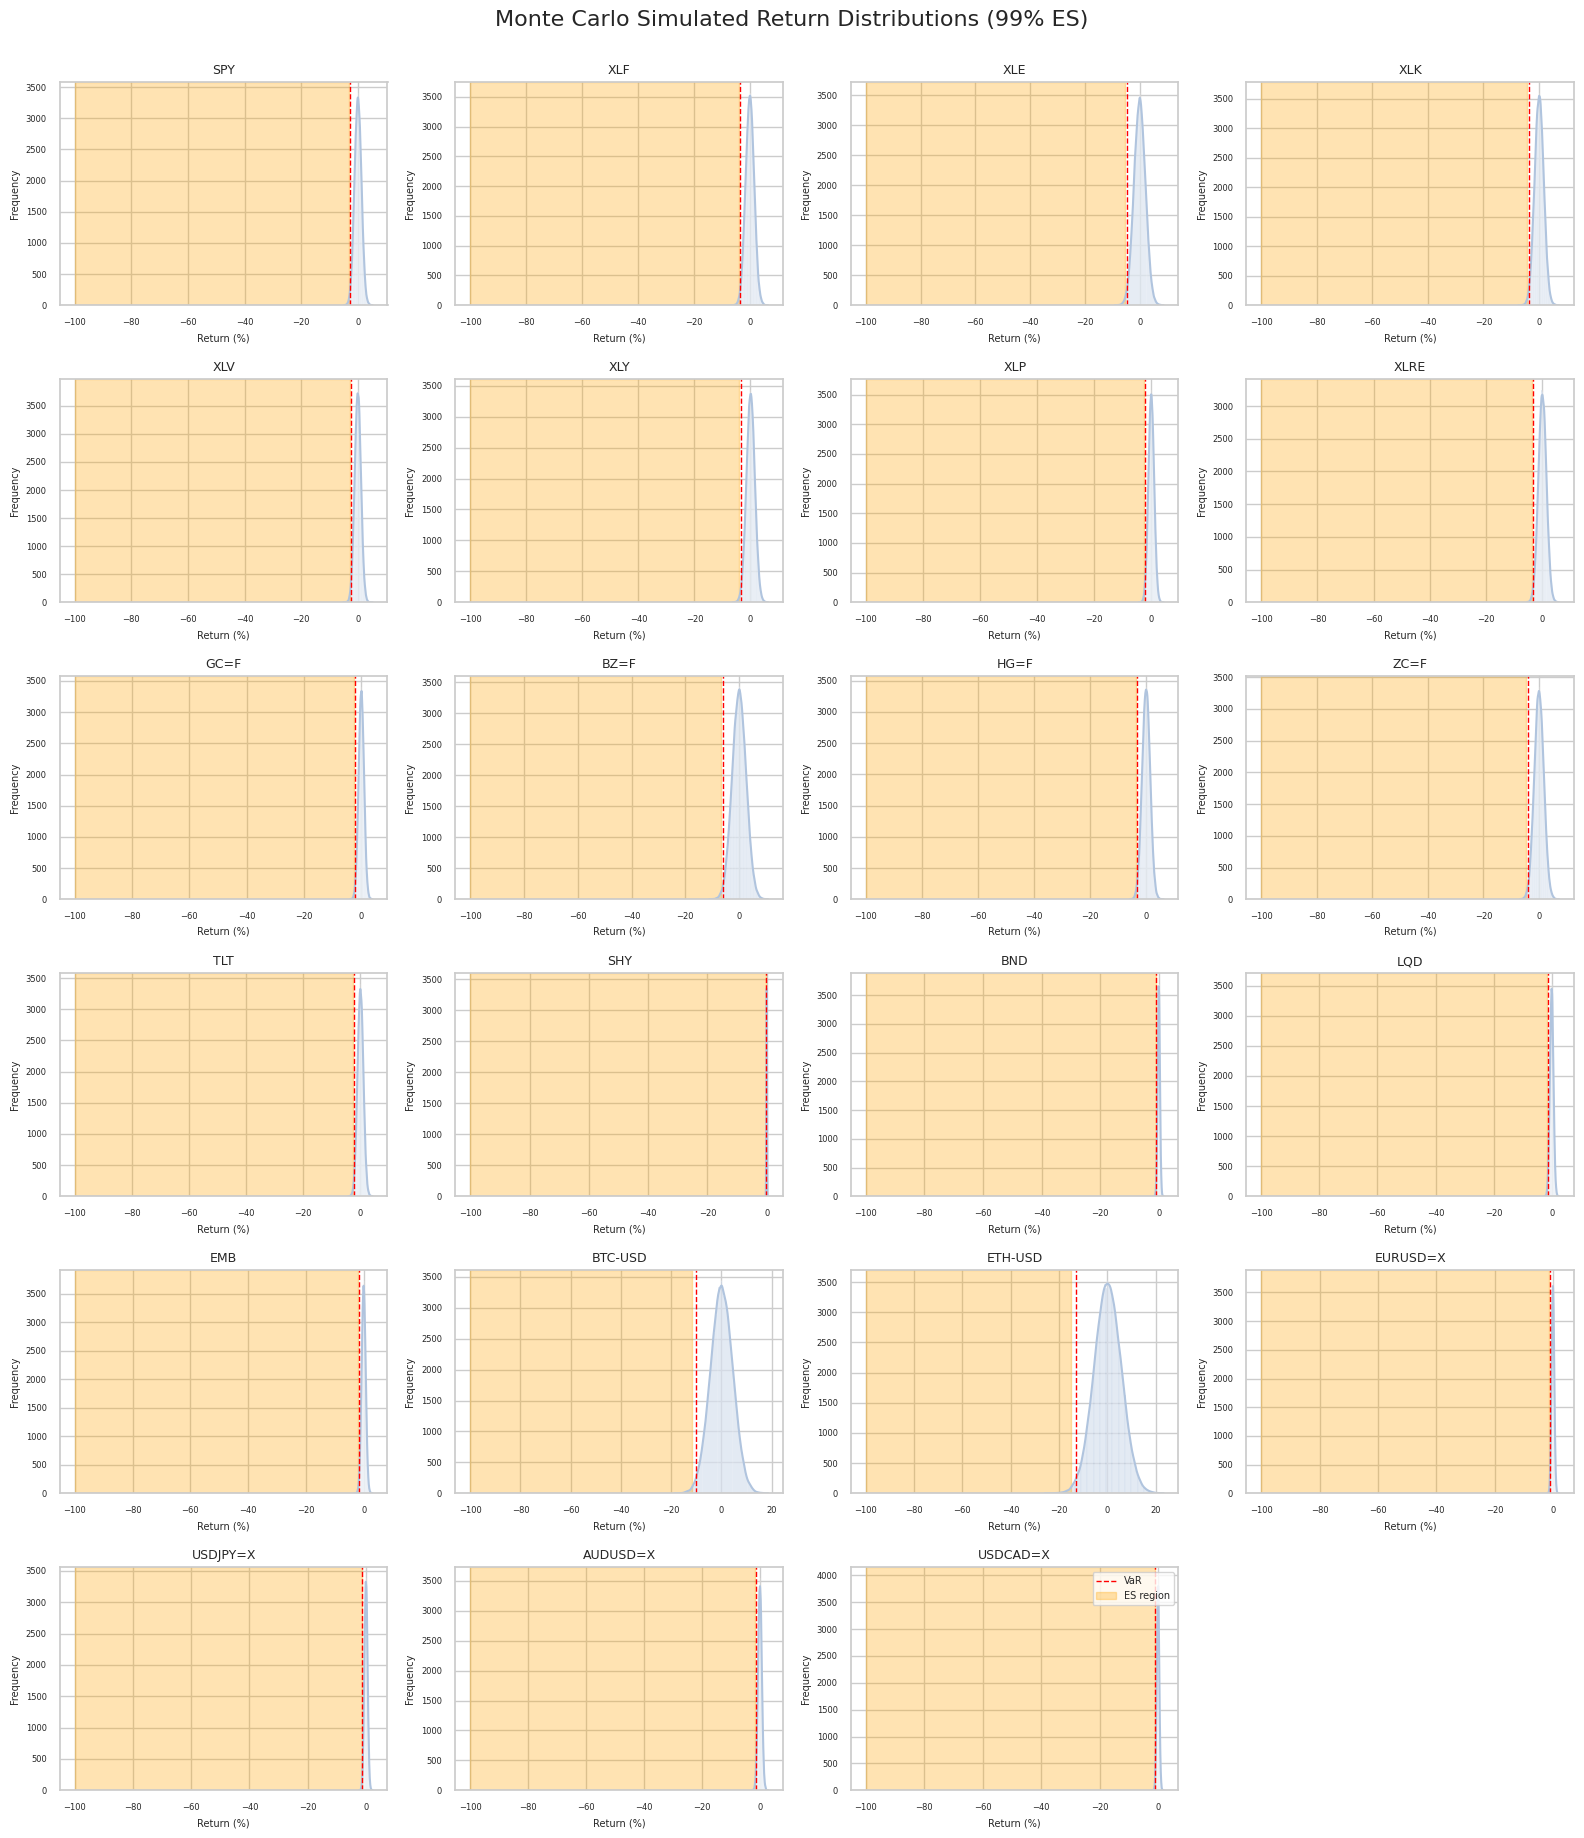

In [10]:
# =======================================
# Visualization: Monte Carlo Return Distributions with ES
# =======================================

def plot_monte_carlo_es_grid(log_returns, confidence_level=0.99, n_simulations=100_000, rows=6, cols=4):
    """Plots Monte Carlo simulated return histograms with ES region shaded per asset."""
    quantile_level = 1 - confidence_level
    symbols = list(log_returns.columns)
    total_assets = len(symbols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
    axes = axes.flatten()

    for idx, symbol in enumerate(symbols):
        if idx >= rows * cols:
            print(f"Only plotting first {rows * cols} assets.")
            break

        mu = log_returns[symbol].mean()
        sigma = log_returns[symbol].std()

        simulated_returns = np.random.normal(loc=mu, scale=sigma, size=n_simulations)
        var_threshold = np.percentile(simulated_returns, 100 * quantile_level)
        es_value = simulated_returns[simulated_returns <= var_threshold].mean()

        ax = axes[idx]
        sns.histplot(simulated_returns * 100, bins=100, kde=True, color='lightsteelblue', ax=ax)

        # VaR line
        ax.axvline(var_threshold * 100, color='red', linestyle='--', linewidth=1, label='VaR')

        # ES region (shading)
        ax.axvspan(-100, es_value * 100, color='orange', alpha=0.3, label='ES region')

        ax.set_title(symbol, fontsize=9)
        ax.set_xlabel("Return (%)", fontsize=7)
        ax.set_ylabel("Frequency", fontsize=7)
        ax.tick_params(axis='both', which='both', labelsize=6)
        ax.grid(True)

    # Remove unused subplots
    for i in range(total_assets, rows * cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.suptitle("Monte Carlo Simulated Return Distributions (99% ES)", fontsize=16, y=1.02)
    plt.legend(fontsize=7, loc='upper right')
    plt.show()

# ✅ Plot Monte Carlo ES histograms
plot_monte_carlo_es_grid(log_returns, rows=6, cols=4)


### EVT based ES

In [14]:
# =======================================
# Type 4: Extreme Value Theory ES (1-Day, 99% Confidence Level)
# =======================================

from scipy.stats import genpareto

# Parameters
confidence_level = 0.99
threshold_quantile = 0.95  # threshold for POT
evt_es_results = {}

for symbol in log_returns.columns:
    returns = log_returns[symbol].dropna()

    # Extract threshold for POT (e.g., 95th percentile of losses)
    threshold = returns.quantile(1 - threshold_quantile)

    # Get exceedances (losses beyond the threshold)
    exceedances = -(returns[returns < threshold] - threshold)

    # Fit GPD to the exceedances
    if len(exceedances) < 30:
        print(f"⚠️ Not enough exceedances to fit GPD for {symbol}")
        continue

    c, loc, scale = genpareto.fit(exceedances)

    # Check that the shape parameter allows ES calculation
    if c >= 1:
        print(f"⚠️ ES not defined for shape parameter ≥ 1 in {symbol}")
        continue

    # Calculate ES at 99% confidence level using GPD
    n = len(returns)
    nu = len(exceedances)
    p = 1 - confidence_level

    # EVT VaR (intermediate step)
    var_evt = threshold + (scale / c) * ((p * n / nu) ** (-c) - 1)

    # EVT ES
    es_evt = var_evt + (scale + c * (var_evt - threshold)) / (1 - c)

    # Convert to positive loss percentage
    es_evt = -es_evt * 100
    evt_es_results[symbol] = es_evt

# Format and sort result
evt_es_df = pd.DataFrame.from_dict(evt_es_results, orient='index', columns=['1-Day EVT ES (%)'])
evt_es_df = evt_es_df.sort_values(by='1-Day EVT ES (%)', ascending=False)

print("\n1-Day EVT Expected Shortfall at 99% Confidence Level (in %):")
print(evt_es_df)



1-Day EVT Expected Shortfall at 99% Confidence Level (in %):
          1-Day EVT ES (%)
HG=F             -0.143558
SHY              -0.313345
USDCAD=X         -0.374766
EURUSD=X         -0.394510
AUDUSD=X         -0.579819
BND              -0.623228
LQD              -0.738866
TLT              -0.810811
GC=F             -0.982199
USDJPY=X         -1.354179
EMB              -1.419938
XLF              -2.082360
XLP              -2.455924
XLK              -3.045856
XLY              -3.101982
XLRE             -3.370421
ZC=F             -3.498865
SPY              -3.795635
BTC-USD          -5.159204
ETH-USD          -7.434484
BZ=F             -7.915232
XLE              -8.994087
XLV             -10.435416



Combined 1-Day VaR Comparison (in %):
          Parametric  Historical  Monte Carlo     EVT
ETH-USD      13.1140     16.7996      13.0838 -0.6428
BTC-USD      10.2788     13.4784      10.1682  0.2017
BZ=F          6.0181      7.0314       6.0877  0.1150
XLE           4.8033      5.4131       4.7912  0.3867
ZC=F          3.9695      4.6832       3.9603  0.0438
XLK           3.8140      4.5392       3.7718  0.3446
XLF           3.5381      3.8182       3.5102  0.2401
XLY           3.4808      4.1314       3.4236  0.2344
HG=F          3.3114      3.9861       3.3188  0.6778
XLRE          3.3057      3.8825       3.3039 -0.0906
SPY           2.8470      3.4806       2.7765 -0.0974
XLV           2.5727      3.2053       2.5344 -0.4518
TLT           2.3705      2.3810       2.3786  0.7266
XLP           2.3220      2.7379       2.2779  0.0283
GC=F          2.1867      2.5359       2.1474  0.5081
EMB           1.6343      1.6977       1.6432  0.0174
AUDUSD=X      1.4986      1.7061       1.50

<Figure size 1200x920 with 0 Axes>

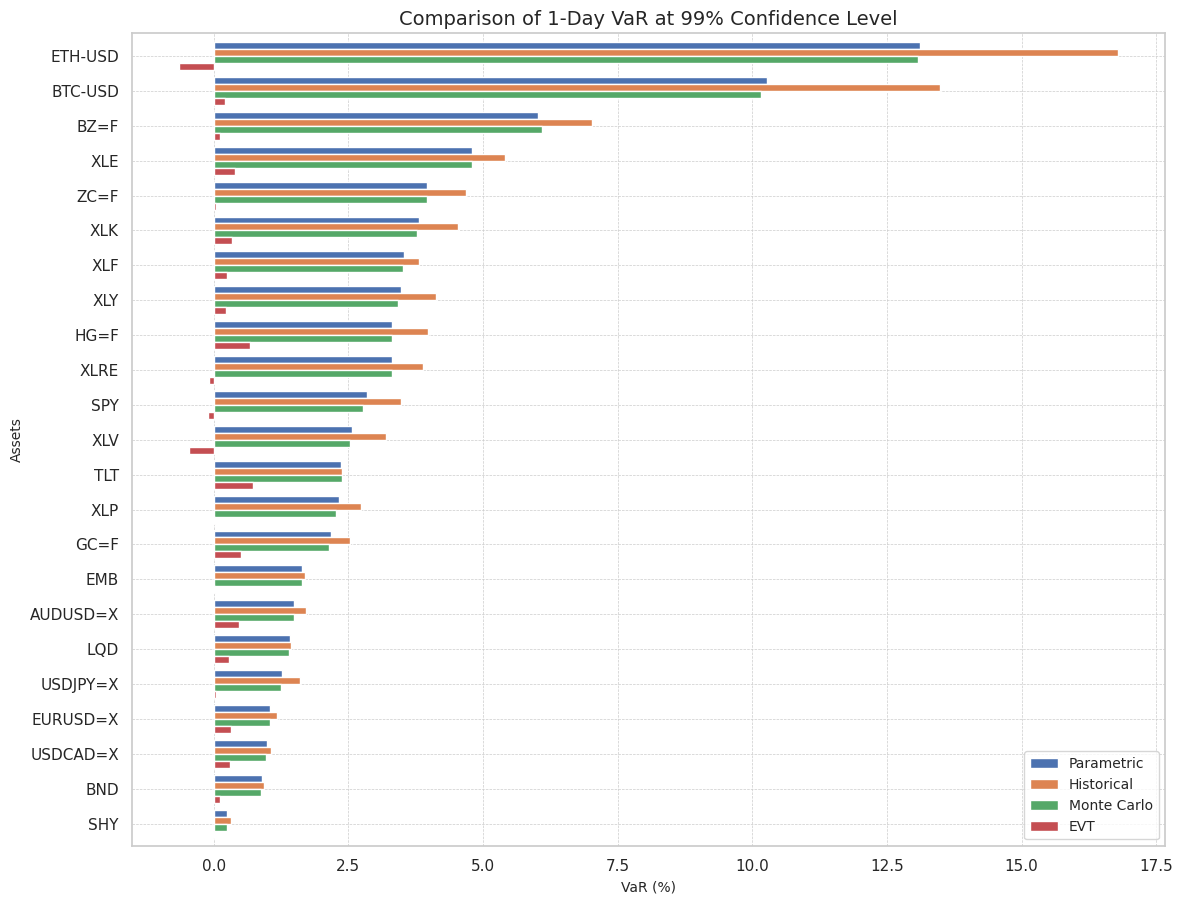

In [19]:
# =======================================
# Comparison: Combined 1-Day VaR (99% Confidence Level)
# =======================================

def plot_combined_var_bar_chart(param_df, hist_df, mc_df, evt_df, sort_by='Parametric'):
    """
    Combines Parametric, Historical, Monte Carlo, and EVT VaR estimates into a single table
    and plots a horizontal bar chart for visual comparison.
    """

    # Rename columns for clarity
    param_df = param_df.rename(columns={'1-Day Parametric VaR (%)': 'Parametric'})
    hist_df = hist_df.rename(columns={'1-Day Historical VaR (%)': 'Historical'})
    mc_df = mc_df.rename(columns={'1-Day Monte Carlo VaR (%)': 'Monte Carlo'})
    evt_df = evt_df.rename(columns={'1-Day EVT VaR (%)': 'EVT'})

    # Merge into a single DataFrame
    combined_df = pd.concat([param_df, hist_df, mc_df, evt_df], axis=1)

    # Drop rows with missing values (e.g., EVT not fitted)
    combined_df = combined_df.dropna()

    # Sort by chosen method
    combined_df = combined_df.sort_values(by=sort_by, ascending=False)

    # Print combined table
    print("\nCombined 1-Day VaR Comparison (in %):")
    print(combined_df.round(4))

    # =======================================
    # Visualization: Horizontal Bar Chart
    # =======================================

    plt.figure(figsize=(12, len(combined_df) * 0.4))
    combined_df.plot(kind='barh', figsize=(12, len(combined_df) * 0.4), width=0.8)

    plt.xlabel('VaR (%)', fontsize=10)
    plt.ylabel('Assets', fontsize=10)
    plt.title('Comparison of 1-Day VaR at 99% Confidence Level', fontsize=14)
    plt.legend(loc='best', fontsize='small')
    plt.gca().invert_yaxis()  # Most risky asset on top
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

    return combined_df  # Return for further use if needed

# ✅ Call the function to compare and plot
combined_var_df = plot_combined_var_bar_chart(var_df, hist_var_df, monte_var_df, evt_var_df)


## Preliminary Discussion of the Results

NOTE: This section is currently ongoing. In the future, we will troubleshoot errors and irregularities in this data

### VAR Comparisons Across Different Techniques


Combined 1-Day VaR Comparison (in %):
          Parametric  Historical  Monte Carlo     EVT
ETH-USD      13.1140     16.7996      13.0838 -0.6428
BTC-USD      10.2788     13.4784      10.1682  0.2017
BZ=F          6.0181      7.0314       6.0877  0.1150
XLE           4.8033      5.4131       4.7912  0.3867
ZC=F          3.9695      4.6832       3.9603  0.0438
XLK           3.8140      4.5392       3.7718  0.3446
XLF           3.5381      3.8182       3.5102  0.2401
XLY           3.4808      4.1314       3.4236  0.2344
HG=F          3.3114      3.9861       3.3188  0.6778
XLRE          3.3057      3.8825       3.3039 -0.0906
SPY           2.8470      3.4806       2.7765 -0.0974
XLV           2.5727      3.2053       2.5344 -0.4518
TLT           2.3705      2.3810       2.3786  0.7266
XLP           2.3220      2.7379       2.2779  0.0283
GC=F          2.1867      2.5359       2.1474  0.5081
EMB           1.6343      1.6977       1.6432  0.0174
AUDUSD=X      1.4986      1.7061       1.50

<Figure size 1200x920 with 0 Axes>

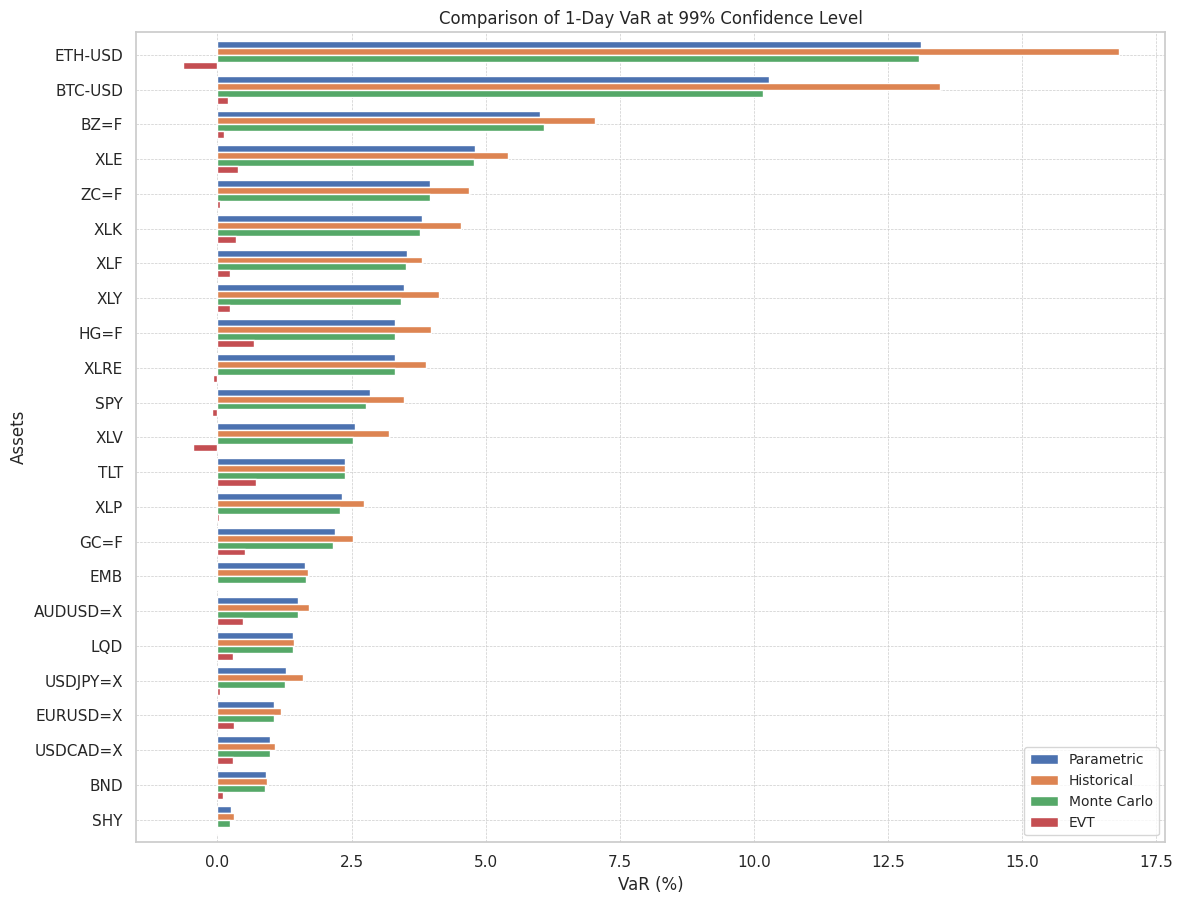

In [18]:
# Combine all VaR DataFrames
combined_var_df = pd.concat([
    var_df.rename(columns={'1-Day Parametric VaR (%)': 'Parametric'}),
    hist_var_df.rename(columns={'1-Day Historical VaR (%)': 'Historical'}),
    monte_var_df.rename(columns={'1-Day Monte Carlo VaR (%)': 'Monte Carlo'}),
    evt_var_df.rename(columns={'1-Day EVT VaR (%)': 'EVT'})
], axis=1)

# Drop rows with missing values (e.g. EVT missing due to few exceedances)
combined_var_df = combined_var_df.dropna()

# Sort by Parametric VaR for display
combined_var_df = combined_var_df.sort_values(by='Parametric', ascending=False)

# Display combined VaR
print("\nCombined 1-Day VaR Comparison (in %):")
print(combined_var_df.round(4))

# Plot bar chart comparing the VaR methods per asset
plt.figure(figsize=(12, len(combined_var_df) * 0.4))
combined_var_df.plot(kind='barh', figsize=(12, len(combined_var_df) * 0.4), width=0.8)

plt.xlabel('VaR (%)')
plt.ylabel('Assets')
plt.title('Comparison of 1-Day VaR at 99% Confidence Level')
plt.legend(loc='best', fontsize='small')
plt.gca().invert_yaxis()  # So the asset with the largest VaR appears on top
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



### ES Comparisons Across Different Techniques


Comparison of 1-Day Expected Shortfall (ES) at 99% Confidence Level (in %):
          Parametric  Historical      EVT  Monte Carlo  Average ES
ETH-USD     -15.0242     23.1473  -7.4345      14.9040      3.8982
BTC-USD     -11.7761     17.7619  -5.1592      11.5842      3.1027
HG=F         -3.7937      4.7610  -0.1436       3.7774      1.1503
XLF          -4.0535      6.5019  -2.0824       3.9822      1.0871
ZC=F         -4.5478      7.5254  -3.4989       4.5452      1.0060
BZ=F         -6.8947     11.4805  -7.9152       6.8532      0.8809
XLK          -4.3696      6.0284  -3.0459       4.3055      0.7296
XLRE         -3.7873      6.2407  -3.3704       3.7909      0.7185
XLY          -3.9878      6.0187  -3.1020       3.9331      0.7155
TLT          -2.7158      3.3432  -0.8108       2.7293      0.6365
GC=F         -2.5052      3.4750  -0.9822       2.4780      0.6164
XLP          -2.6603      4.4494  -2.4559       2.6251      0.4896
EMB          -1.8724      3.3199  -1.4199       1.86

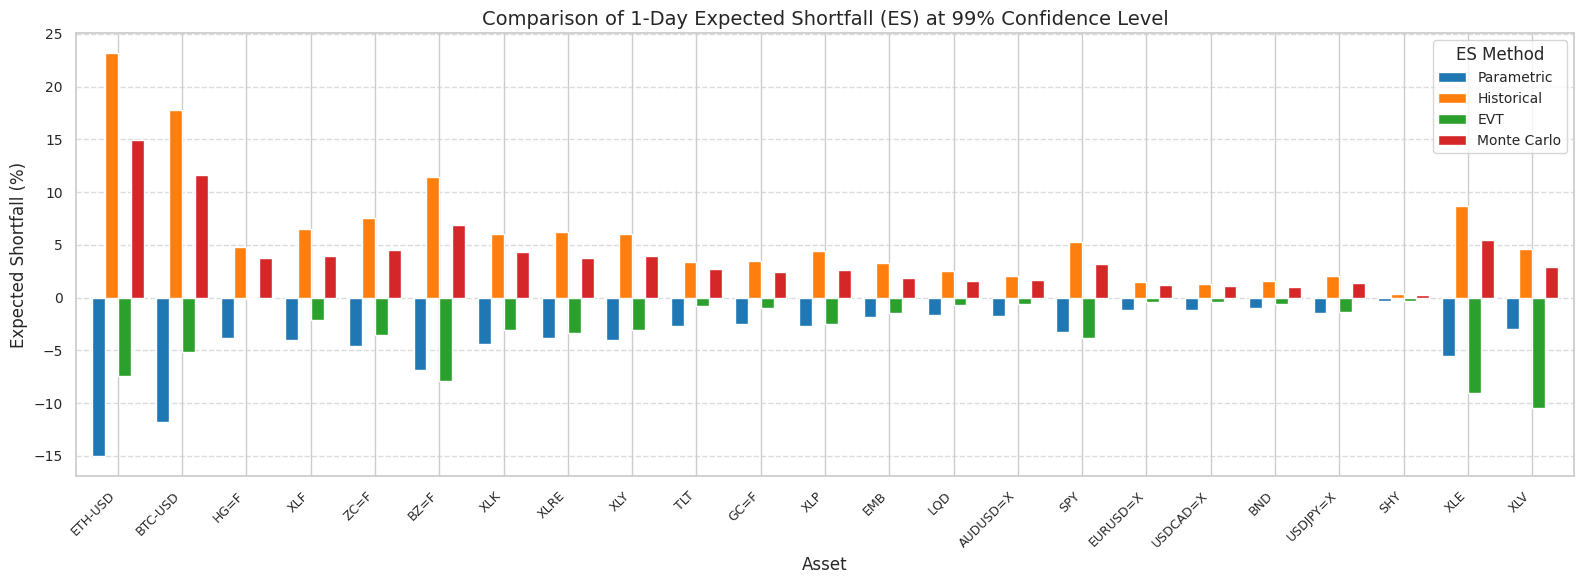

In [21]:
# =======================================
# Combine all ES estimates into a single DataFrame
# =======================================

# Rename each DataFrame's column to match technique
es_combined_df = pd.concat([
    es_df.rename(columns={'1-Day Parametric Expected Shortfall (%)': 'Parametric'}),
    hist_es_df.rename(columns={'1-Day Historical Expected Shortfall (%)': 'Historical'}),
    evt_es_df.rename(columns={'1-Day EVT ES (%)': 'EVT'})
], axis=1)

# Monte Carlo ES - Estimate from simulation (same as VaR grid above)
monte_carlo_es = {}

for symbol in log_returns.columns:
    mu = log_returns[symbol].mean()
    sigma = log_returns[symbol].std()
    simulated_returns = np.random.normal(loc=mu, scale=sigma, size=100_000)
    var_threshold = np.percentile(simulated_returns, 100 * (1 - confidence_level))
    es_value = simulated_returns[simulated_returns <= var_threshold].mean()
    monte_carlo_es[symbol] = -es_value * 100  # Convert to % and positive loss

# Convert Monte Carlo results to DataFrame
monte_es_df = pd.Series(monte_carlo_es, name='Monte Carlo').to_frame()

# Merge into combined DataFrame
es_combined_df = es_combined_df.join(monte_es_df, how='outer')

# Sort by average ES across all models (or pick one model as default)
es_combined_df['Average ES'] = es_combined_df.mean(axis=1)
es_combined_df = es_combined_df.sort_values(by='Average ES', ascending=False)

# =======================================
# Display the Combined Comparison Table
# =======================================
print("\nComparison of 1-Day Expected Shortfall (ES) at 99% Confidence Level (in %):")
print(es_combined_df.round(4))


import matplotlib.pyplot as plt

# Drop 'Average ES' for clean visualization
es_combined_df_plot = es_combined_df.drop(columns=['Average ES'])

# Plot the ES comparison
es_combined_df_plot.plot(
    kind='bar',
    figsize=(16, 6),
    width=0.8,
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
)

plt.title("Comparison of 1-Day Expected Shortfall (ES) at 99% Confidence Level", fontsize=14)
plt.ylabel("Expected Shortfall (%)", fontsize=12)
plt.xlabel("Asset", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=10)
plt.legend(title="ES Method", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
